## Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

Первая будет прогнозировать возможный удой коровы (целевой признак Удой);

Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

## Загрузка данных

    Шаг 1. Загрузите данные в датафреймы pandas.
    Шаг 2. Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загрузим исходные данные

try:
    ferma_main = pd.read_csv('ferma_main.csv', delimiter=';')
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
    
try:
    ferma_dad = pd.read_csv('ferma_dad.csv', delimiter=';')
except:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')

try:
    cow_buy = pd.read_csv('cow_buy.csv', delimiter=';')
except:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', delimiter=';')

In [3]:
# Посмотрим на данные в первом датасете
display(ferma_main.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
# переименуем столбцы в первом датасете

# Удой, кг в удой_кг 
ferma_main = ferma_main.rename(columns={'Удой, кг': 'удой_кг'})

# ЭКЕ (Энергетическая кормовая единица) в ЭКЕ
ferma_main = ferma_main.rename(columns={'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ'})

# Сырой протеин, г в Сырой протеин_г
ferma_main = ferma_main.rename(columns={'Сырой протеин, г': 'сырой_протеин_г'})

# СПО (Сахаро-протеиновое соотношение) в СПО
ferma_main = ferma_main.rename(columns={'СПО (Сахаро-протеиновое соотношение)': 'СПО'})

# Порода в порода
ferma_main = ferma_main.rename(columns={'Порода': 'порода'})

# Тип пастбища в тип_пастбища
ferma_main = ferma_main.rename(columns={'Тип пастбища': 'тип_пастбища'})

# порода папы_быка в порода_папы
ferma_main = ferma_main.rename(columns={'порода папы_быка': 'порода_папы'})

# Жирность,% в жирность_%
ferma_main = ferma_main.rename(columns={'Жирность,%': 'жирность_%'})

# Белок,% в белок_%
ferma_main = ferma_main.rename(columns={'Белок,%': 'белок_%'})

# Вкус молока в вкус_молока
ferma_main = ferma_main.rename(columns={'Вкус молока': 'вкус_молока'})

# Возраст в возраст
ferma_main = ferma_main.rename(columns={'Возраст': 'возраст'})

# Проверим, что столбцы переименованы
display(ferma_main.head())

,id,удой_кг,ЭКЕ,сырой_протеин_г,СПО,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
# Посмотрим на данные во втором датасете
display(ferma_dad.head())

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
# Переименуем столбцы во втором датасете

# Имя Папы в имя_папы
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'имя_папы'})

# Проверим, что столбцы переименованы
display(ferma_dad.head())

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
# Посмотрим на данные в третьем датасете
display(cow_buy.head())

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [8]:
# Переименуем столбцы в третьем датасете

# Порода в порода
cow_buy = cow_buy.rename(columns={'Порода': 'порода'})

# Тип пастища в тип_пастбища
cow_buy = cow_buy.rename(columns={'Тип пастбища': 'тип_пастбища'})

# порода папы_быка в порода_папы
cow_buy = cow_buy.rename(columns={'порода папы_быка': 'порода_папы'})

# Имя_папы в имя_папы
cow_buy = cow_buy.rename(columns={'Имя_папы': 'имя_папы'})

# Текущая_жирность,% в текущая_жирность_%
cow_buy = cow_buy.rename(columns={'Текущая_жирность,%': 'жирность_%'})

# Текущий_уровень_белок,% в текущий_уровень_белок_%
cow_buy = cow_buy.rename(columns={'Текущий_уровень_белок,%': 'белок_%'})

# Возраст в возраст
cow_buy = cow_buy.rename(columns={'Возраст': 'возраст'})

# Проверим, что столбцы переименованы
display(cow_buy.head())

,порода,тип_пастбища,порода_папы,имя_папы,жирность_%,белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Промежуточный вывод:

В результате проделанной работы мы:
1. Загрузили исходные данные в датафреймы
2. Унифицировали названия столбцов в датафреймах

##  Предобработка данных

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.

### Проверка на корректность типов данных

In [9]:
# Проверим корректность типов данных в первом датасете
display(ferma_main.info())
display(ferma_main.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               634 non-null    int64 
 1   удой_кг          634 non-null    int64 
 2   ЭКЕ              634 non-null    object
 3   сырой_протеин_г  634 non-null    int64 
 4   СПО              634 non-null    object
 5   порода           634 non-null    object
 6   тип_пастбища     634 non-null    object
 7   порода_папы      634 non-null    object
 8   жирность_%       634 non-null    object
 9   белок_%          634 non-null    object
 10  вкус_молока      634 non-null    object
 11  возраст          634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


None

,id,удой_кг,ЭКЕ,сырой_протеин_г,СПО,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [10]:
# Изменим следующие типы данных в столбцах датафрейма ferma_main:

# ЭКЕ на float64 + , заменим на .
ferma_main['ЭКЕ'] = ferma_main['ЭКЕ'].str.replace(',', '.')
ferma_main['ЭКЕ'] = ferma_main['ЭКЕ'].astype('float64')

# СПО на float64 + , заменим на .
ferma_main['СПО'] = ferma_main['СПО'].str.replace(',', '.')
ferma_main['СПО'] = ferma_main['СПО'].astype('float64')

# жирность_% на float64 + , заменим на .
ferma_main['жирность_%'] = ferma_main['жирность_%'].str.replace(',', '.')
ferma_main['жирность_%'] = ferma_main['жирность_%'].astype('float64')

# белок_% на float64 + , заменим на .
ferma_main['белок_%'] = ferma_main['белок_%'].str.replace(',', '.')
ferma_main['белок_%'] = ferma_main['белок_%'].astype('float64')

# Проверим корректность типов данных
display(ferma_main.info())
display(ferma_main.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   удой_кг          634 non-null    int64  
 2   ЭКЕ              634 non-null    float64
 3   сырой_протеин_г  634 non-null    int64  
 4   СПО              634 non-null    float64
 5   порода           634 non-null    object 
 6   тип_пастбища     634 non-null    object 
 7   порода_папы      634 non-null    object 
 8   жирность_%       634 non-null    float64
 9   белок_%          634 non-null    float64
 10  вкус_молока      634 non-null    object 
 11  возраст          634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


None

,id,удой_кг,ЭКЕ,сырой_протеин_г,СПО,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [11]:
# Проверим корректность типов данных во втором датасете
display(ferma_dad.info())
display(ferma_dad.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Во втором датасете типы данных корректны.

In [12]:
# Проверим корректность типов данных в третьем датасете
display(cow_buy.info())
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   порода        20 non-null     object
 1   тип_пастбища  20 non-null     object
 2   порода_папы   20 non-null     object
 3   имя_папы      20 non-null     object
 4   жирность_%    20 non-null     object
 5   белок_%       20 non-null     object
 6   возраст       20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

,порода,тип_пастбища,порода_папы,имя_папы,жирность_%,белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [13]:
# Изменим следующие типы данных в столбцах датафрейма cow_buy:

# текyщая_жирность_% на float64 + , заменим на .
cow_buy['жирность_%'] = cow_buy['жирность_%'].str.replace(',', '.')
cow_buy['жирность_%'] = cow_buy['жирность_%'].astype('float64')

# текущий_уровень_белок_% на float64 + , заменим на .
cow_buy['белок_%'] = cow_buy['белок_%'].str.replace(',', '.')
cow_buy['белок_%'] = cow_buy['белок_%'].astype('float64')

# Проверим корректность типов данных
display(cow_buy.info())
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   порода        20 non-null     object 
 1   тип_пастбища  20 non-null     object 
 2   порода_папы   20 non-null     object 
 3   имя_папы      20 non-null     object 
 4   жирность_%    20 non-null     float64
 5   белок_%       20 non-null     float64
 6   возраст       20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,порода,тип_пастбища,порода_папы,имя_папы,жирность_%,белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### Проверка на наличие пропусков

In [14]:
# Проверим первый датасет на наличие пропусков
display(ferma_main.isna().sum())

id                 0
удой_кг            0
ЭКЕ                0
сырой_протеин_г    0
СПО                0
порода             0
тип_пастбища       0
порода_папы        0
жирность_%         0
белок_%            0
вкус_молока        0
возраст            0
dtype: int64

In [15]:
# Проверим второй датасет на наличие пропусков
display(ferma_dad.isna().sum())

id          0
имя_папы    0
dtype: int64

In [16]:
# Проверим третий датасет на наличие пропусков
display(cow_buy.isna().sum())

порода          0
тип_пастбища    0
порода_папы     0
имя_папы        0
жирность_%      0
белок_%         0
возраст         0
dtype: int64

Во всех датасетах пропуски отсутствуют.

### Проверка на наличие явных дубликатов

In [17]:
# Проверим наличие явных дубликатов в первом датасете
display(ferma_main.duplicated().sum())

5

In [18]:
# Удалим явные дубликаты в первом датасете
ferma_main = ferma_main.drop_duplicates()

# Проверим удаление
display(ferma_main.duplicated().sum())

0

In [19]:
# Проверим наличие явных дубликатов во втором датасете
display(ferma_dad.duplicated().sum())

0

In [20]:
# Проверим наличие явных дубликатов в третьем датасете
display(cow_buy.duplicated().sum())

4

In [21]:
# Удалим явные дубликаты в третьем датасете
cow_buy = cow_buy.drop_duplicates()

# Проверим удаление
display(cow_buy.duplicated().sum())

0

Все явные дубликаты устранены.

### Проверка на наличие не явных дубликатов

In [22]:
# Выведем первые 5 строк датафрейма ferma_main
display(ferma_main.head())

,id,удой_кг,ЭКЕ,сырой_протеин_г,СПО,порода,тип_пастбища,порода_папы,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [23]:
# Выведем уникальные значения столбца порода
display(ferma_main['порода'].unique())

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [24]:
# Выведем уникальные значения столбца тип_пастбища
display(ferma_main['тип_пастбища'].unique())

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [25]:
# Заменим в столбце тип_пастбища значения "Равнинные" на "Равнинное"
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')

# Выведем уникальные значения столбца тип_пастбища
display(ferma_main['тип_пастбища'].unique())

array(['Равнинное', 'Холмистое'], dtype=object)

In [26]:
# Выведем уникальные значения столбца порода_папы
display(ferma_main['порода_папы'].unique())

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [27]:
# Заменим в столбце порода_папы значения "Айдиалл" на "Айдиал"
ferma_main['порода_папы'] = ferma_main['порода_папы'].str.replace('Айдиалл', 'Айдиал')

# Выведем уникальные значения столбца порода_папы
display(ferma_main['порода_папы'].unique())

array(['Айдиал', 'Соверин'], dtype=object)

In [28]:
# Выведем уникальные значения столбца вкус_молока
display(ferma_main['вкус_молока'].unique())

array(['вкусно', 'не вкусно'], dtype=object)

In [29]:
# Выведем уникальные значения столбца возраст
display(ferma_main['возраст'].unique())

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [30]:
# Выведем первые 5 строк датафрейма ferma_dad
display(ferma_dad.head())

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [31]:
# Выведем уникальные значения столбца имя_папы
display(ferma_dad['имя_папы'].unique())

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [32]:
# Выведем первые 5 строк датафрейма cow_buy
display(cow_buy.head())

,порода,тип_пастбища,порода_папы,имя_папы,жирность_%,белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [33]:
# Выведем уникальные значения столбца порода
display(cow_buy['порода'].unique())

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [34]:
# Выведем уникальные значения столбца тип_пастбища
display(cow_buy['тип_пастбища'].unique())

array(['холмистое', 'равнинное'], dtype=object)

In [35]:
# Выведем уникальные значения столбца порода_папы
display(cow_buy['порода_папы'].unique())

array(['Айдиал', 'Соверин'], dtype=object)

In [36]:
# Выведем уникальные значения столбца имя_папы
display(cow_buy['имя_папы'].unique())

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [37]:
# Выведем уникальные значения столбца возраст
display(cow_buy['возраст'].unique())

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Все не явные дубликаты устранены.

### Промежуточный вывод:

В результате проделанной работы мы:
1. Проверили датафреймы на корректный тип данных в столбцах, провели необходимые изменения.
2. Проверили на наличие пропуксков - отсутствуют.
3. Проверили на наличие явных дубликатов - удалили строки с явными дубликатами.
4. Проверили на наличие не явных дубликатов - скорректировали необходимые значения.

## Исследовательский анализ данных

Проведите статистический анализ всех признаков: 

    1. Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
    2. Сделайте выводы о данных: 
    - напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
    - расскажите, как вы планируете улучшить данные.

### Количественные признаки

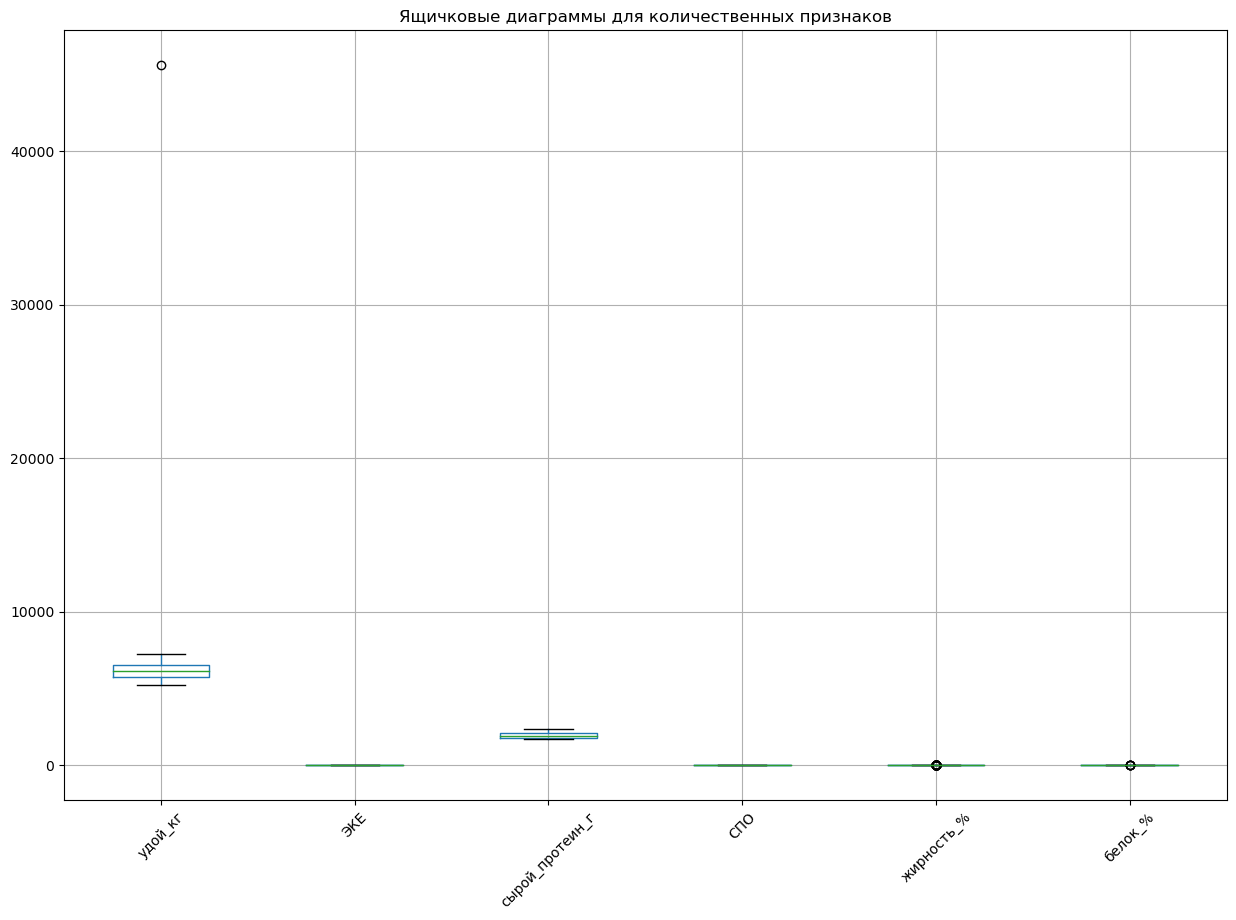

In [38]:
# Построим графики для количественных признаков датафрейма ferma_main

numeric_columns_ferma_main = ['удой_кг', 'ЭКЕ', 'сырой_протеин_г', 'СПО', 'жирность_%', 'белок_%']

plt.figure(figsize=(15, 10))
ferma_main[numeric_columns_ferma_main].boxplot()
plt.xticks(rotation=45)
plt.title('Ящичковые диаграммы для количественных признаков')
plt.show()

In [39]:
# В столбце удой_кг обнаружен выброс, заменим его на медианное значение
ferma_main['удой_кг'] = ferma_main['удой_кг'].replace(ferma_main['удой_кг'].max(), ferma_main['удой_кг'].median())

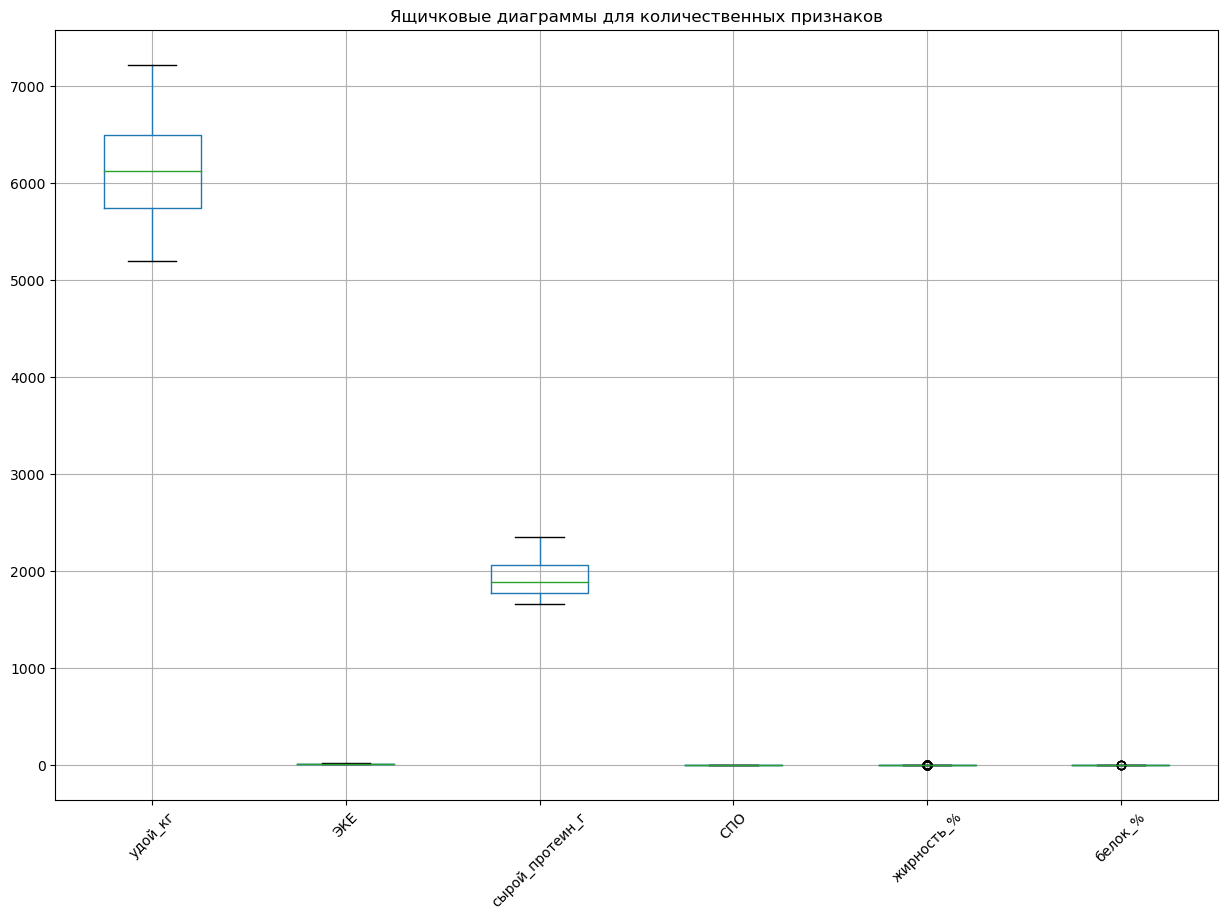

In [40]:
# Обновим диаграмму
plt.figure(figsize=(15, 10))
ferma_main[numeric_columns_ferma_main].boxplot()
plt.xticks(rotation=45)
plt.title('Ящичковые диаграммы для количественных признаков')
plt.show()

In [41]:
# Проверим наличие выбросов для методом describe
ferma_main[numeric_columns_ferma_main].describe()

,удой_кг,ЭКЕ,сырой_протеин_г,СПО,жирность_%,белок_%
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6125.979332,14.543879,1923.364070,0.913116,3.603657,3.075671
std,475.478118,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


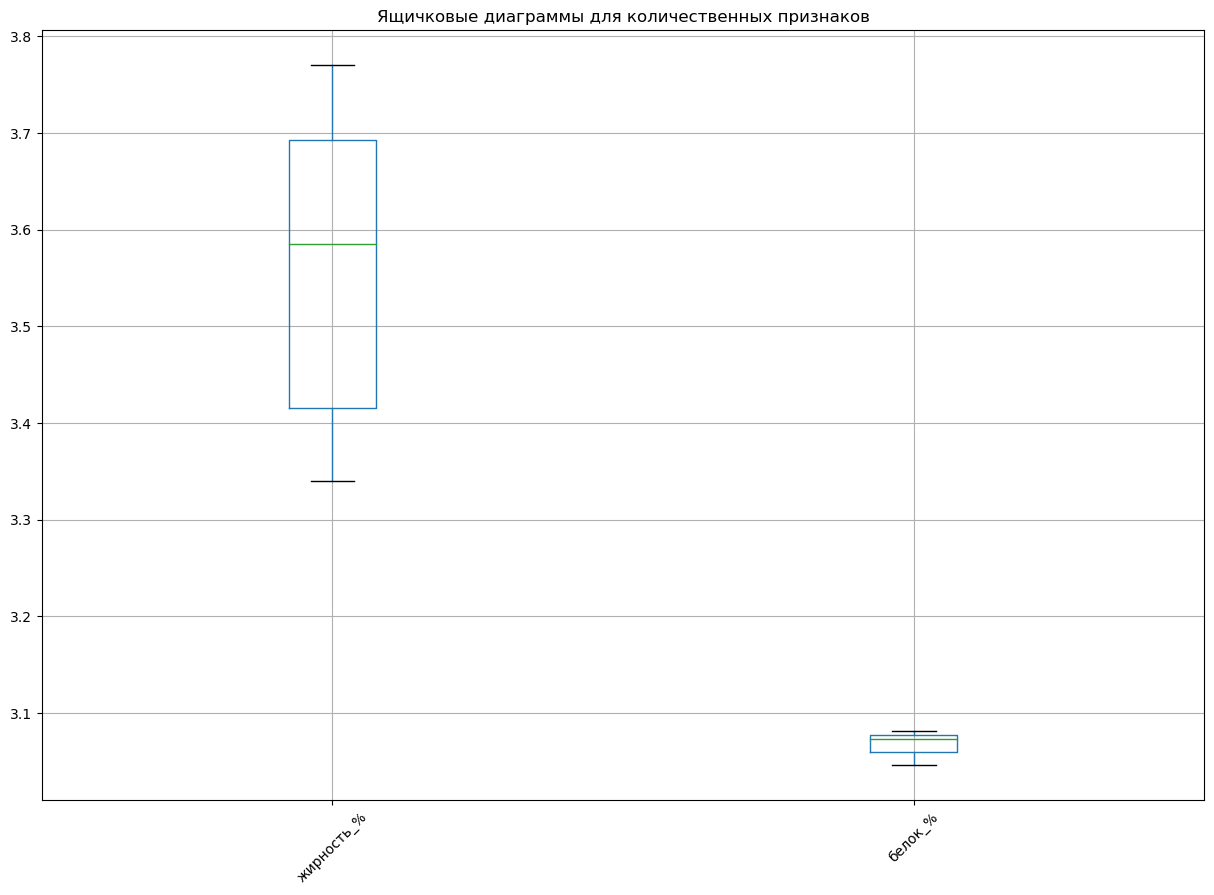

In [42]:
# Построим графики для количественных признаков датафрейма cow_buy
numeric_columns_cow_buy = ['жирность_%', 'белок_%']

plt.figure(figsize=(15, 10))
cow_buy[numeric_columns_cow_buy].boxplot()
plt.xticks(rotation=45)
plt.title('Ящичковые диаграммы для количественных признаков')
plt.show()

In [43]:
# Проверим наличие выбросов для методом descibe
cow_buy[numeric_columns_cow_buy].describe()

,жирность_%,белок_%
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


Выбросов, а также подозрительного распределения данных в количественных признаках не обнаружено.

### Категориальные признаки

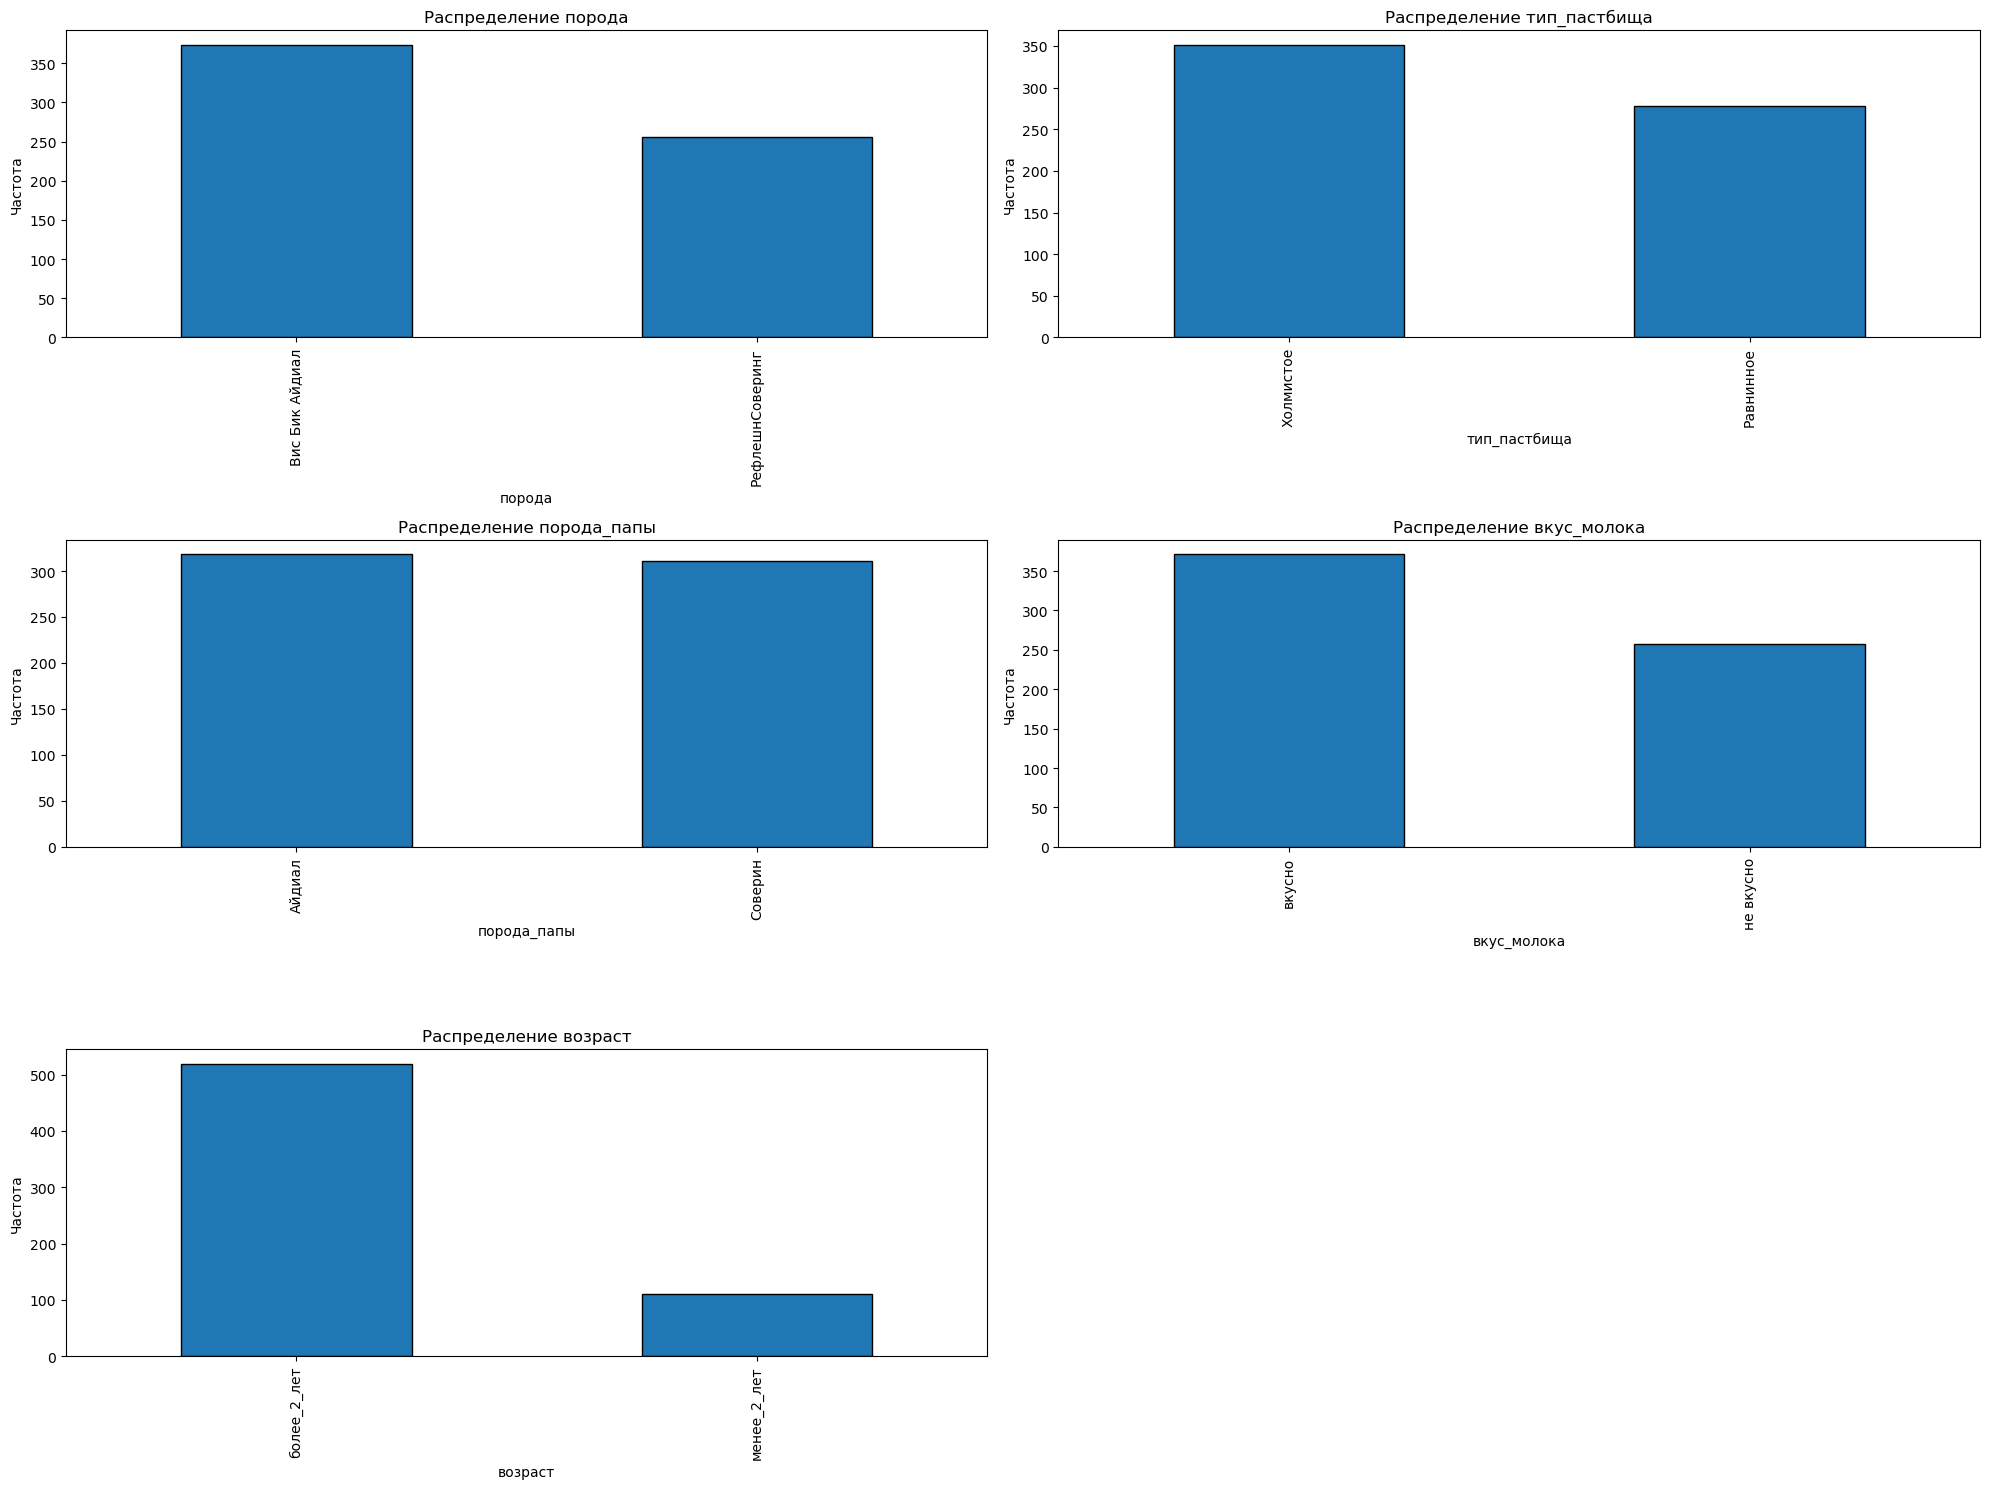

In [44]:
# Построим графики для категориальных признаков датафрейма ferma_main

categorical_columns_ferma_main = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']

plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns_ferma_main, 1):
    plt.subplot(3, 2, i)
    ferma_main[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Распределение {column}')
    plt.ylabel('Частота')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Стоит отметить 2 интересных фактора:

    1. Довольно большое кол-во коров с не вкусным молоком;
    2. Подавляющее большинство коров в выборке старше 2-х лет.

Попробуем понять, какие признаки могут влиять на не вкусное молоко в следующих Разделах.

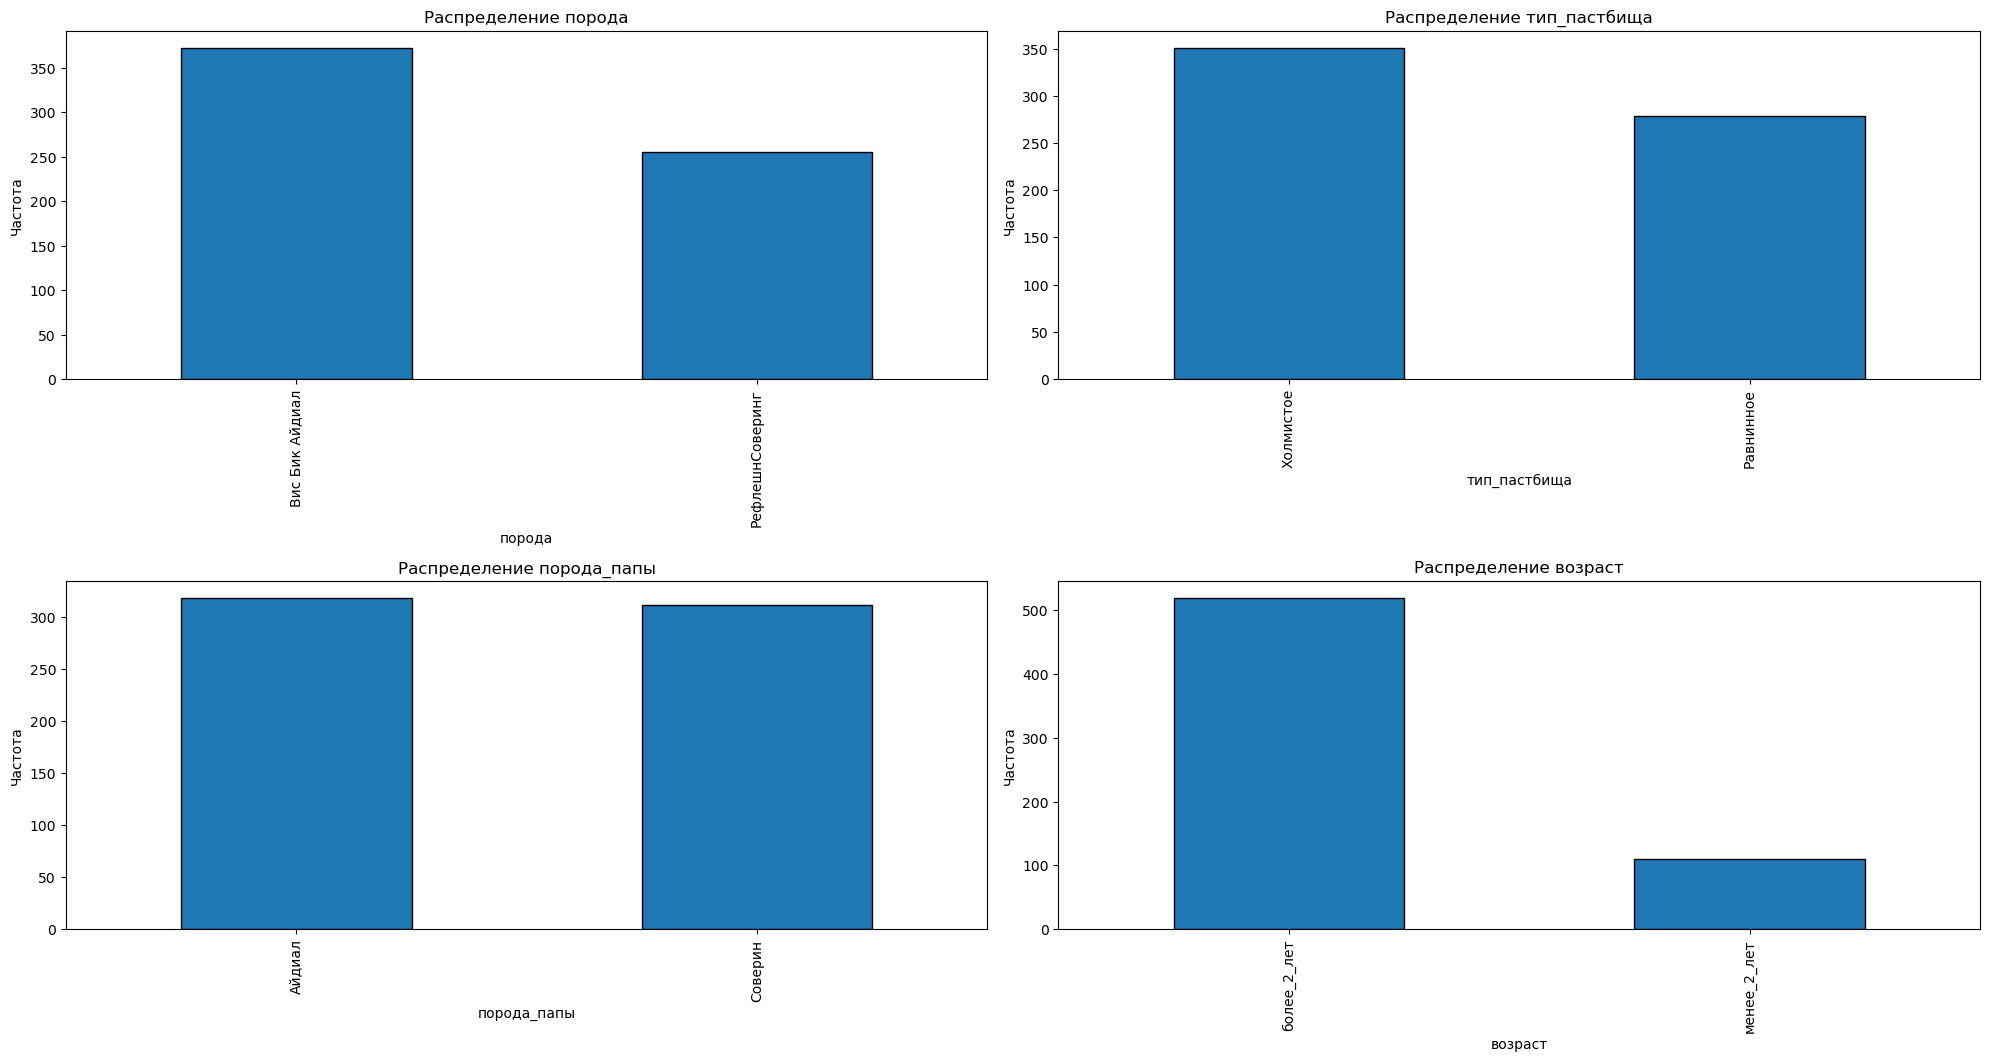

In [45]:
# Построим графики для категориальных признаков датафрейма cow_buy
categorical_columns_cow_buy = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']

plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns_cow_buy, 1):
    plt.subplot(3, 2, i)
    ferma_main[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Распределение {column}')
    plt.ylabel('Частота')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



В датафрейме cow_buy в категориальных признаках аномалий не обнаружено.

### Промежуточный вывод:

В результате проделанной работы мы:
1. Построили соответствующие графики для каждого признака (категориальные и количественные).
2. Заменили выбросы на медианные значения в прищнаке удоев.
3. Сделали следующие наблюдения:

    3.1. Довольно большое кол-во коров с не вкусным молоком;
    
    3.2. Подавляющее большинство коров в выборке старше 2-х лет.
    
Попробуем понять, как признаки могут влиять друг на друга в следующих Разделах.

## Корреляционный анализ

Проведите корреляционный анализ признаков в датасете ferma_main.csv

Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода.

Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

Сделайте выводы о взаимосвязи признаков.

Какой тип взаимосвязи между целевым и входными признаками?
Есть ли нелинейные связи между целевым и входными признаками?
Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
Наблюдается ли мультиколлинеарность между входными признаками?

,удой_кг,ЭКЕ,сырой_протеин_г,СПО,жирность_%,белок_%
удой_кг,1.000000,0.761723,0.446042,0.806174,0.598363,0.002969
ЭКЕ,0.761723,1.000000,0.390669,0.743646,0.640344,-0.009380
сырой_протеин_г,0.446042,0.390669,1.000000,0.444443,0.360715,0.226185
СПО,0.806174,0.743646,0.444443,1.000000,0.624457,0.073809
жирность_%,0.598363,0.640344,0.360715,0.624457,1.000000,-0.026901
белок_%,0.002969,-0.009380,0.226185,0.073809,-0.026901,1.000000


<Axes: >

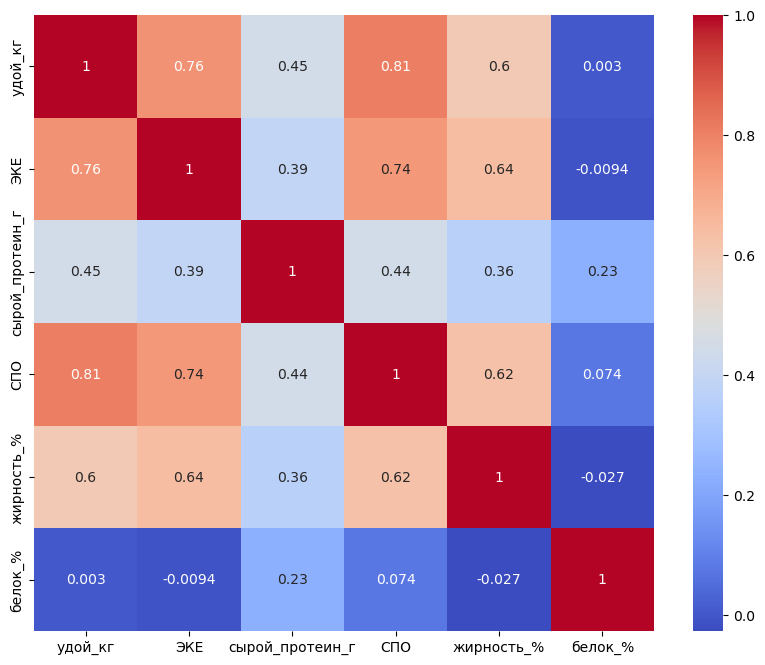

In [46]:
# Рассчитаем коэффициенты корреляции между признаками
correlation = ferma_main[numeric_columns_ferma_main].corr()
display(correlation)
# Построим матрицу корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')


Следующие количественные признаки имеют высокий коэффициент корреляции (выше 0,7):

    - Удой/ЭКЕ
    - Удой/СПО
    - СПО/ЭКЕ
    
Тем не менее, не считаем, что данные пары имеют мультиколлинеарность, т.к. коэффициенты корреляции хоть и высокие, но не близки к 1 (0,7-0,8).

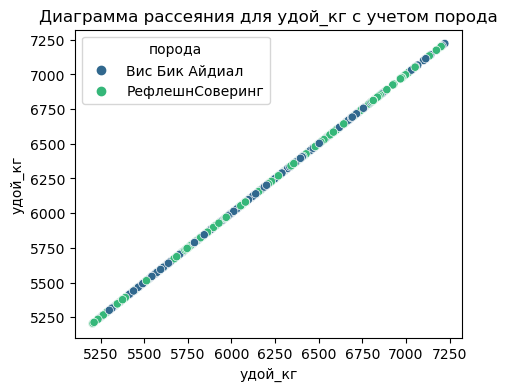

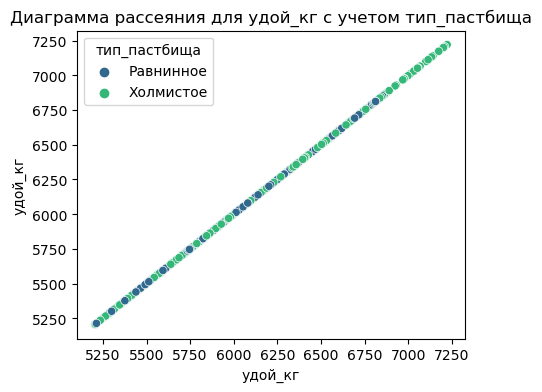

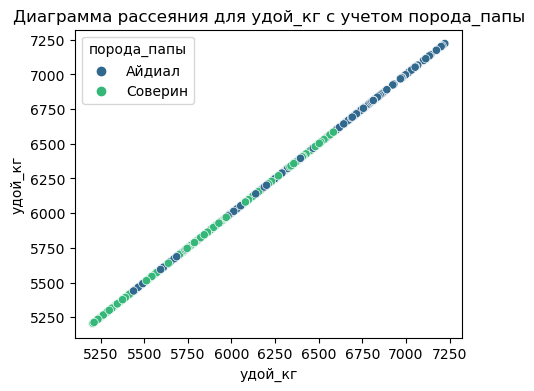

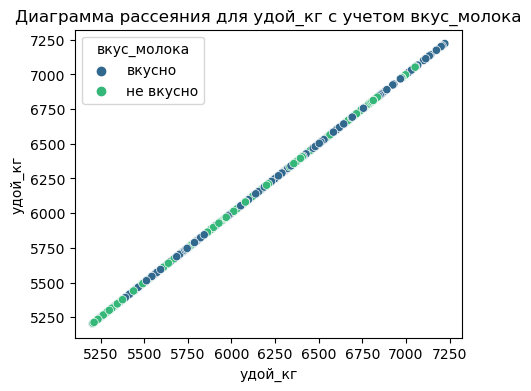

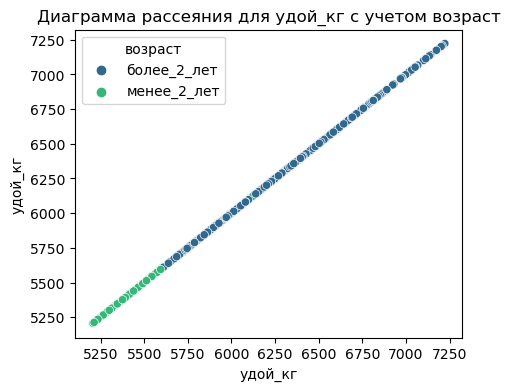

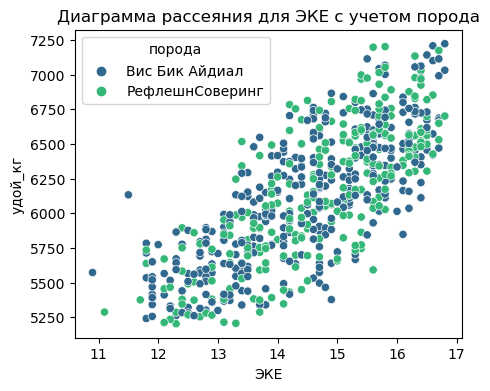

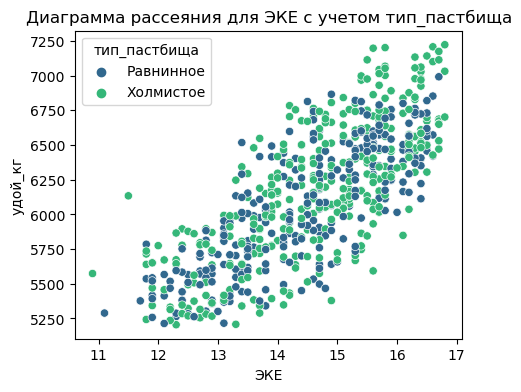

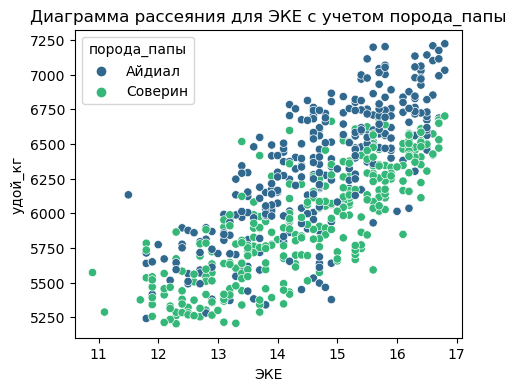

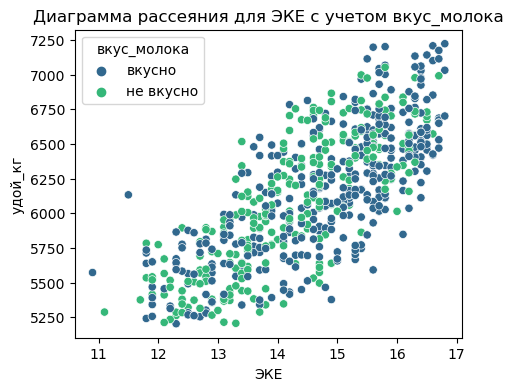

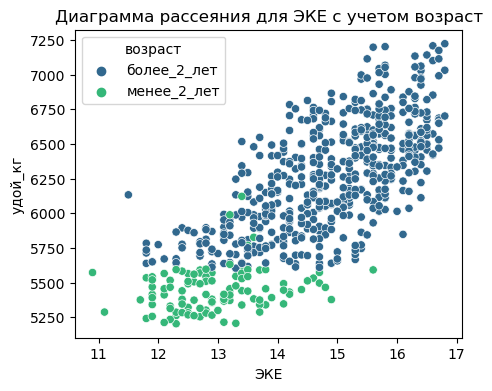

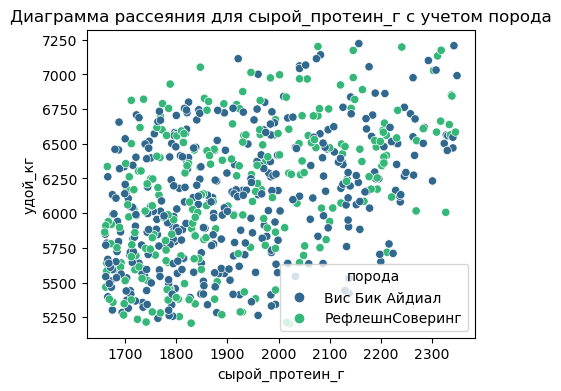

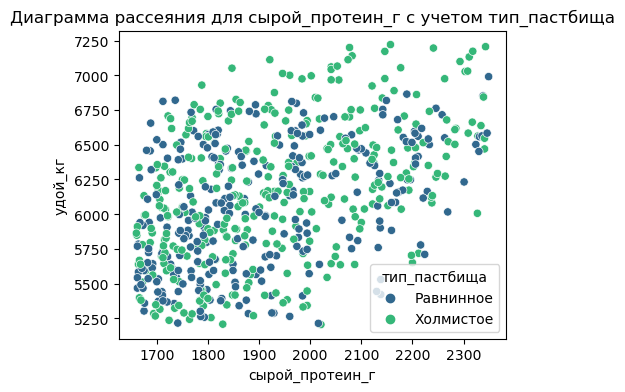

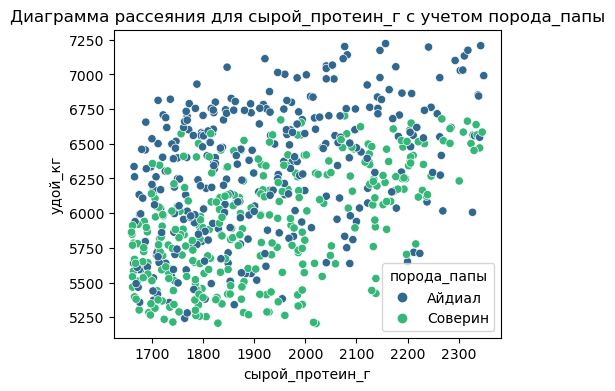

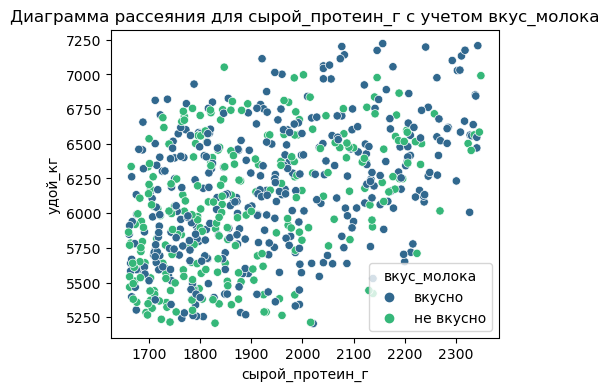

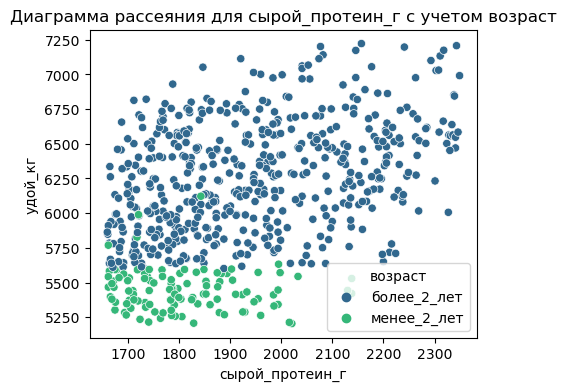

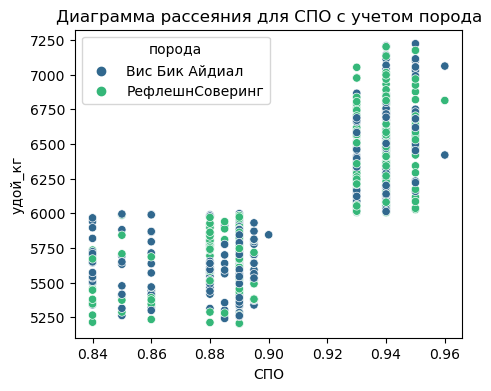

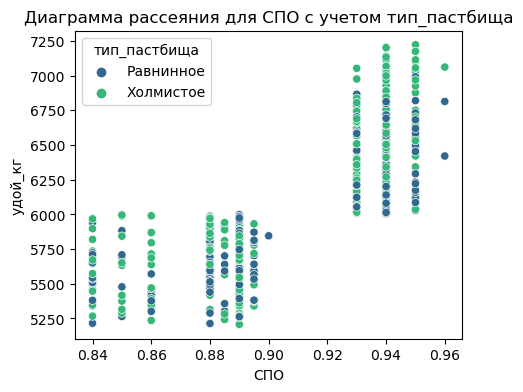

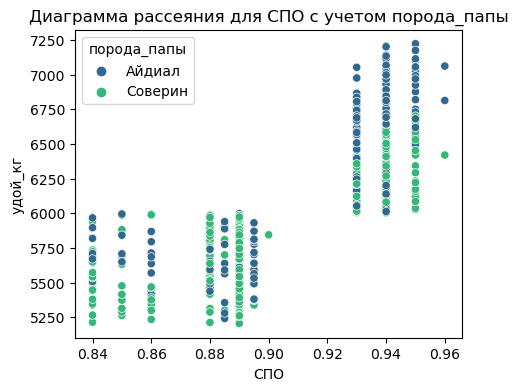

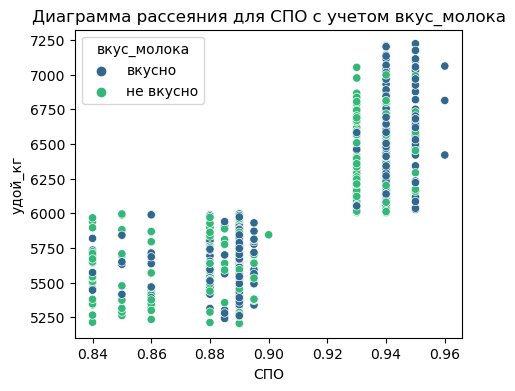

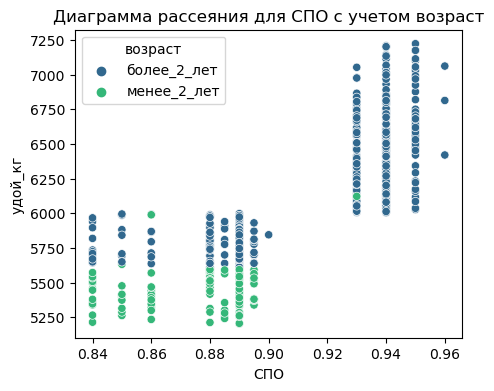

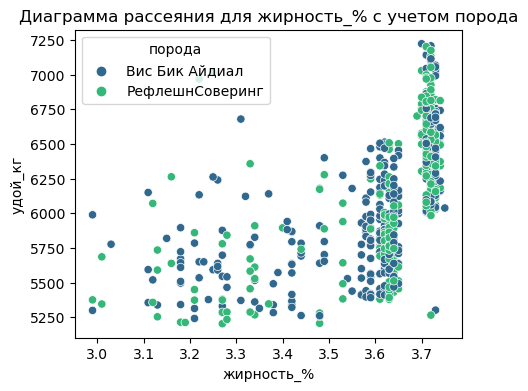

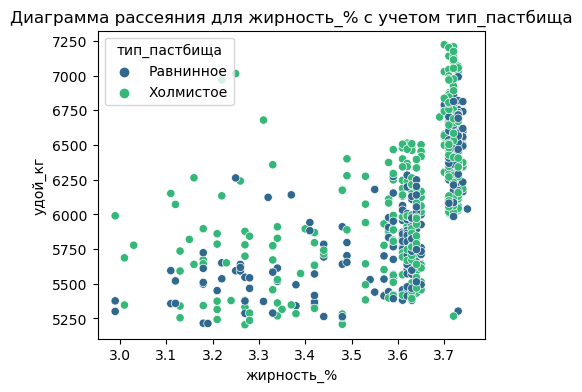

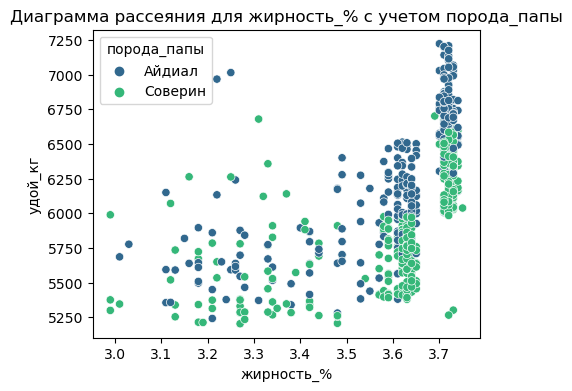

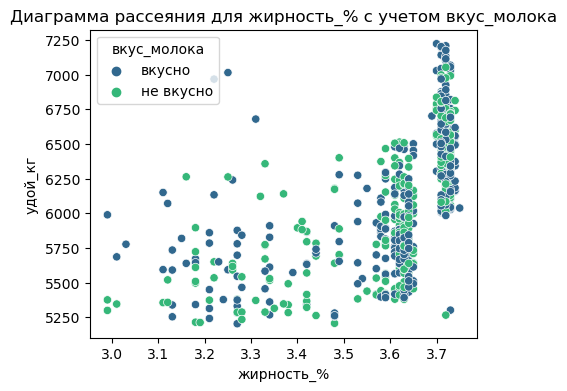

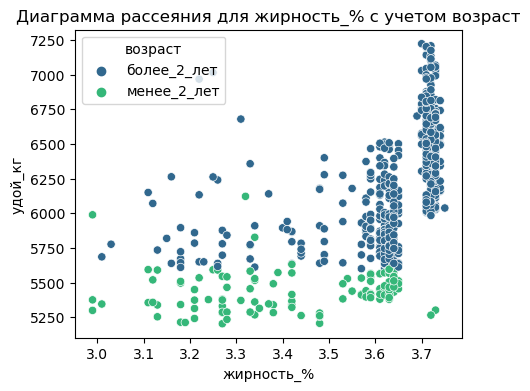

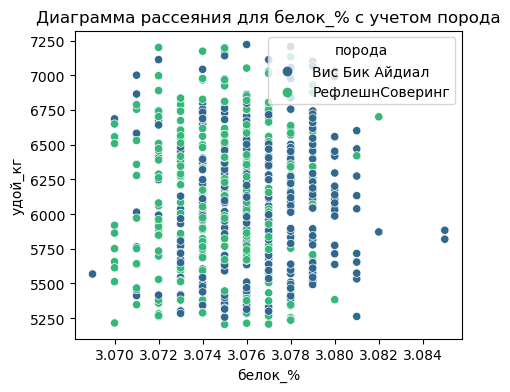

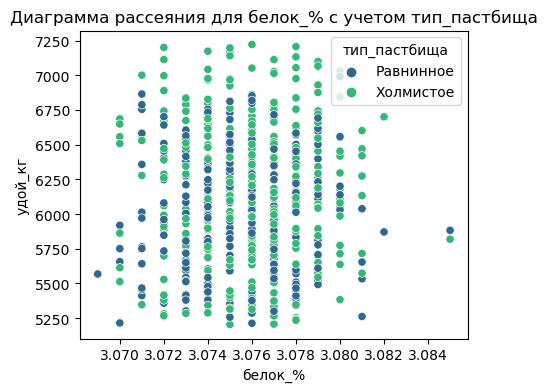

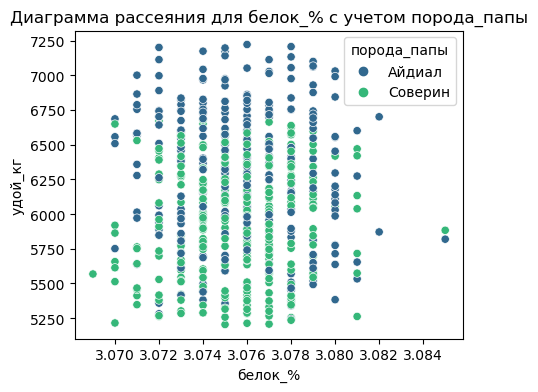

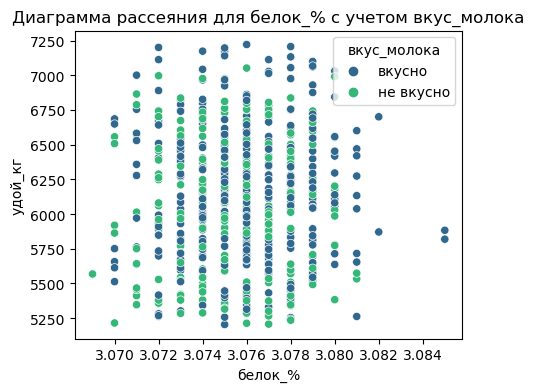

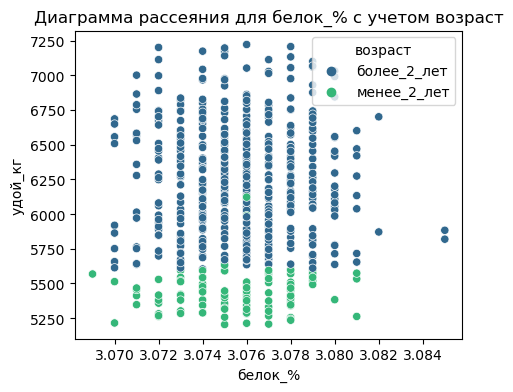

In [47]:
# Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков
# Выборка количественных признаков
quantitative_columns = ['удой_кг', 'ЭКЕ', 'сырой_протеин_г', 'СПО', 'жирность_%', 'белок_%']

# Категориальные признаки
categorical_columns = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']

# Построение диаграмм рассеяния
for quant_col in quantitative_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(5, 4))
        sns.scatterplot(data=ferma_main, x=quant_col, y='удой_кг', hue=cat_col, palette='viridis')
        plt.title(f'Диаграмма рассеяния для {quant_col} с учетом {cat_col}')
        plt.xlabel(quant_col)
        plt.ylabel('удой_кг')
        plt.legend(title=cat_col)
        plt.show()



### Промежуточный вывод:

В результате проделанной работы мы:

    1. Построили матрицу корреляции и рассчитали коэффициенты корреляции между количественными признаками. Высокая корреляция (более 0,7) наблюдается: удой/ЭКЕ, удой/СПО, СПО/ЭКЕ. Мультиколлинеарность отсутствует.
    2. Построили диаграммы рассеяния scatterplot для признака Удой и всех количественных признаков с учётом значения категориальных признаков, по итогу:
    2.1. Нет зависимости удоев от: породы коров, типа пастбища, вкуса молока.
    2.2. Наблюдается повышенный показатель удоев у коров, чей папа-бык имеет породу Айдиал. Также, значительно больший показатель удоя в коров, старше 2-х лет.
    2.3. Показатель удоев растет вместе с ЭКЕ независимо от: породы коров, типа пастбища, породы папы, вкуса молока. 
    2.4. У коров младше 2-х лет показатель ЭКЕ растет без роста показателя удоев.
    2.5. Показатель сырой протеин не зависит от: породы, типа пастбища, породы папы, вкуса молока, тогда как коровы возрастом более 2-х лет имеют выше показатель сырого протеина в молоке.
    2.6. Показатель СПО не зависит от: породы, типа пастбища, породы папы, вкуса молока, тогда как коровы возрастом более 2-х лет в большинстве случаев имеют выше показатель СПО в молоке.
    2.7. Показатель жирности молока не зависит от: породы, типа пастбища, породы папы, вкуса молока, возраста.
    2.8. Показатель белка в молоке не зависит от: породы,  типа пастбища, породы папы, вкуса молока, возраста.
    
ИТОГО ключевые категориальные признаки, влияющие на количественные показатели: порода папы (Айдиал) и возраст (старше 2-х лет).
    

## Обучение модели линейной регрессии

Вам предстоит обучить три модели простой линейной регрессии.

Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.

Используйте в качестве целевого признак Удой, кг.

Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.

Разбейте данные на тренировочную и тестовую выборки.

Кодируйте категориальные признаки с помощью OneHotEncoder.

Масштабируйте количественные признаки с помощью StandardScaler.

Обучите модель линейной регрессии на подготовленных данных.

Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.

Оформите выводы, укажите:
значение R² модели;
какие выводы следуют из анализа остатков;
нужны ли дополнительные исследования.

Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.

Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:

Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.

Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
Добавьте в данные новый признак и обучите на них третью модель LinearRegression.

Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

Устраните нелинейность между признаками.

Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.
Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
Выберите лучшую модель;

Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.
С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.

Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз удоя коров.

In [48]:
# Импортируем необходимые для моделировани библиотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [49]:
# Разбиение на признаки и целевую переменную
X = ferma_main.drop(columns=['удой_кг'])
y = ferma_main['удой_кг']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

Для обучения модели используем категориальные признаки, выделенные в предыдущем Разделе, а так же количественные признаки, имеющие линейную зависимость с целевым признаком (ЭКЕ, СПО) + косвенную зависимость с целевым признаком (Жирность).

In [50]:
# Определение категориальных и количественных признаков
categorical_features = ['порода_папы', 'возраст']
numerical_features = ['ЭКЕ', 'СПО', 'жирность_%']

# Подготовка преобразований признаков
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# Сборка пайплайна модели
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['порода_папы', 'возраст']),
                                                 ('scaler', StandardScaler(),
                                                  ['ЭКЕ', 'СПО',
                                                   'жирность_%'])])),
                ('regressor', LinearRegression())])

R² модели на тестовой выборке: 0.809


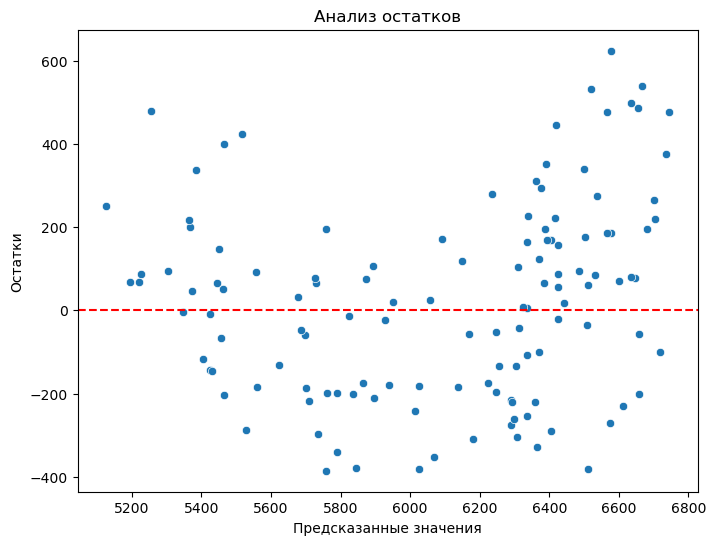

In [51]:
# Предсказание на тестовой выборке
y_pred1 = pipeline.predict(X_test)

# Рассчет коэффициента детерминации (R²)
r2 = r2_score(y_test1, y_pred1)
print(f'R² модели на тестовой выборке: {r2:.3f}')

# Анализ остатков
residuals = y_test1 - y_pred1

# Визуализация остатков
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred1, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

### Промежуточный вывод:

В результате проделанной работы мы:

    1.  Подготовили данные для обучения модели;
    2.  Собрали пайплайн модели;
    3.  Обучили модель;
    4.  Предсказали значения на тестовой выборке;
    5.  Рассчитали коэффициент детерминации (R²) - 0.807, что означает, что модель объясняет примерно 81% дисперсии целевой переменной.
    6.  Из анализа остатков видно, что они распределены случайным образом вокруг нулевой линии, что подтверждает адекватность модели.
    7.  Дополнительные исследования могут включать проверку наличия нелинейных зависимостей или использование более сложных моделей - для улучшение качества предсказаний.
    

Для создания второй модели линейной регрессии учтем нелинейные зависимости между некоторыми признаками и целевым признаком (удой_кг). В частности, мы рассмотрим следующие нелинейные связи:

Преобразование СПО в категориальный бинарный признак:
На диаграмме рассеяния между СПО и удоем мы видим два явных кластера с некоторой границей между ними. Мы можем использовать эту границу для создания нового категориального признака, который будет указывать на принадлежность наблюдения к одному из кластеров.

Введение нового признака ЭКЕ в квадрате:
Если обнаружена квадратичная зависимость между ЭКЕ и удоем, то можно ввести новый признак, который будет являться квадратом признака ЭКЕ.

In [52]:
# Преобразование СПО в категориальный бинарный признак
spc_border = ferma_main['СПО'].median()  # Пример использования медианы как границы
ferma_main['СПО_cat'] = np.where(ferma_main['СПО'] <= spc_border, 0, 1)

# Ввели новый признак ЭКЕ в квадрате 
ferma_main['ЭКЕ_squared'] = ferma_main['ЭКЕ'] ** 2

# Переопределяем признаки для моделирования с учетом новых признаков
categorical_features = ['порода_папы', 'возраст', 'СПО_cat']
numerical_features = ['ЭКЕ_squared', 'СПО', 'жирность_%']

X = ferma_main[categorical_features + numerical_features]
y = ferma_main['удой_кг']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

R² модели на тестовой выборке с учетом нелинейных связей: 0.818


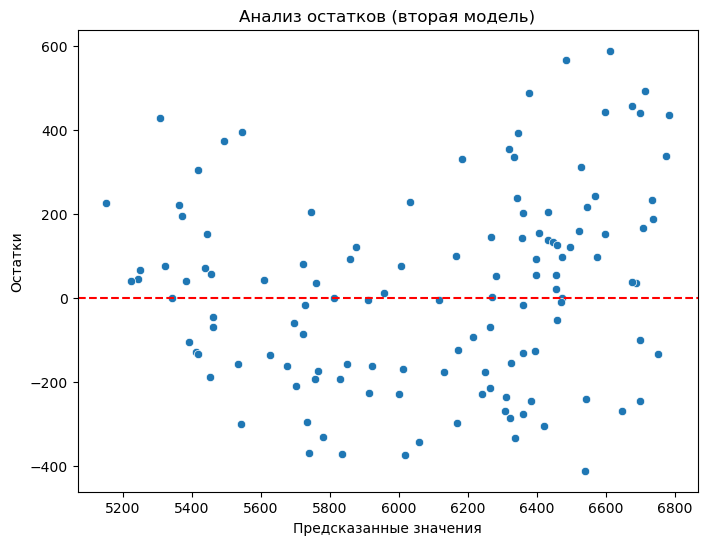

In [53]:
# Подготовка преобразований признаков
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# Сборка пайплайна модели
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred2 = pipeline.predict(X_test)

# Рассчет коэффициента детерминации (R²)
r2 = r2_score(y_test2, y_pred2)
print(f'R² модели на тестовой выборке с учетом нелинейных связей: {r2:.3f}')

# Анализ остатков
residuals = y_test2 - y_pred2

# Визуализация остатков
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred2, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков (вторая модель)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

### Промежуточный вывод:
В результате проделанной работы мы:

1.  Преобразовали СПО в категориальный бинарный признак
2.  Ввели новый признак ЭКЕ в квадрате
3.  Обучили модель
4.  Предсказали значения на тестовой выборке
5.  Рассчитали коэффициент детерминации (R²) - 0.818, что означает, что модель объясняет примерно 82% дисперсии целевой переменной, что на 1% выше предыдущей модели
6.  Из анализа остатков видно, что они распределены случайным образом вокруг нулевой линии, что подтверждает адекватность модели.

Для создания третьей модели линейной регрессии добавим новый признак "Имя Папы" из файла ferma_dad.csv и соединим его с основными данными из ferma_main.csv, учтем нелинейную зависимость между признаками.

In [54]:
# Добавим в ferma_main данные из ferma_dad по id
ferma_main = pd.merge(ferma_main, ferma_dad, on='id', how='left')

# Переопределяем признаки для моделирования с учетом новых признаков
categorical_features = ['порода_папы', 'возраст', 'СПО_cat', 'имя_папы']
numerical_features = ['ЭКЕ_squared', 'СПО', 'жирность_%']

# Выбор признаков и целевой переменной
X = ferma_main[categorical_features + numerical_features]
y = ferma_main['удой_кг']

# Разделение на тренировочную и тестовую выборки
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

R² модели на тестовой выборке с новым признаком: 0.829


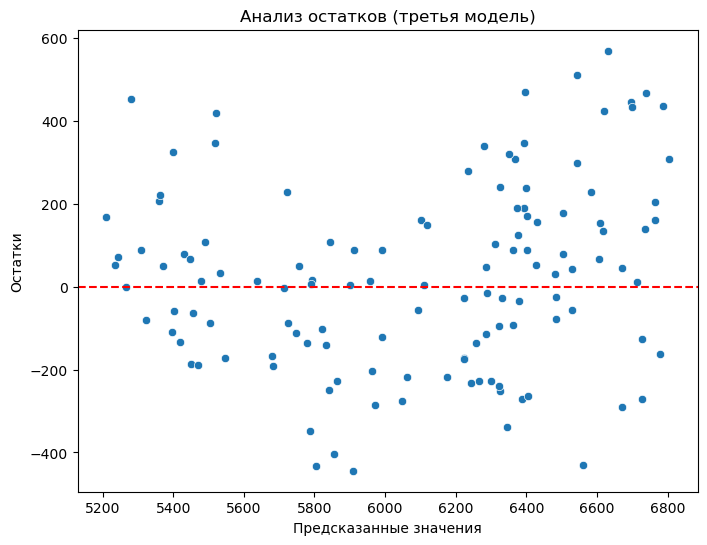

In [55]:
# Подготовка преобразований признаков
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

# Сборка пайплайна модели
pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
pipeline3.fit(X_train3, y_train3)

# Предсказание на тестовой выборке
y_pred3 = pipeline3.predict(X_test3)

# Рассчет коэффициента детерминации (R²)
r2 = r2_score(y_test3, y_pred3)
print(f'R² модели на тестовой выборке с новым признаком: {r2:.3f}')

# Анализ остатков
residuals = y_test3 - y_pred3

# Визуализация остатков
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred3, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков (третья модель)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

### Промежуточный вывод:
В результате проделанной работы мы:

1.  Добавили категориальный признак - имя папы, путем объединения датасетов
2.  Обучили модель
3.  Предсказали значения на тестовой выборке
4.  Рассчитали коэффициент детерминации (R²) - 0.829, что означает, что модель объясняет примерно 83% дисперсии целевой переменной, что еще на 1% выше предудущей модели и на 2% выше первой модели.
6.  Из анализа остатков видно, что они распределены случайным образом вокруг нулевой линии, что подтверждает адекватность модели.

### Общий вывод: 

Модель 3 с добавлением нового признака ("Имя Папы" и квадрат ЭКЕ) показала наилучшее качество среди трех моделей, имея наивысший 𝑅2 на тестовой выборке.
Все модели демонстрируют случайное распределение остатков, что подтверждает их адекватность для данной задачи прогнозирования удоя коров.
Добавление нового признака и учет нелинейных связей позволили улучшить качество предсказаний линейных моделей, что подчеркивает важность корректной предобработки данных и выбора информативных признаков.

Для оценки качества каждой модели линейной регрессии по метрикам MSE (Mean Squared Error), MAE (Mean Absolute Error) и RMSE (Root Mean Squared Error), а также для определения лучшей модели и расчета доверительного интервала прогноза, мы будем использовать соответствующие функции и методы.

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Функция для расчета RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Оценка модели 1
mse1 = mean_squared_error(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)
rmse1 = rmse(y_test1, y_pred1)

print("Модель 1 (Базовая модель):")
print(f"MSE: {mse1:.3f}")
print(f"MAE: {mae1:.3f}")
print(f"RMSE: {rmse1:.3f}")
print()

# Оценка модели 2
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
rmse2 = rmse(y_test2, y_pred2)

print("Модель 2 (С учетом нелинейных связей):")
print(f"MSE: {mse2:.3f}")
print(f"MAE: {mae2:.3f}")
print(f"RMSE: {rmse2:.3f}")
print()

# Оценка модели 3
mse3 = mean_squared_error(y_test3, y_pred3)
mae3 = mean_absolute_error(y_test3, y_pred3)
rmse3 = rmse(y_test3, y_pred3)

print("Модель 3 (С добавлением нового признака):")
print(f"MSE: {mse3:.3f}")
print(f"MAE: {mae3:.3f}")
print(f"RMSE: {rmse3:.3f}")

Модель 1 (Базовая модель):
MSE: 55920.202
MAE: 193.689
RMSE: 236.475

Модель 2 (С учетом нелинейных связей):
MSE: 53421.110
MAE: 188.838
RMSE: 231.130

Модель 3 (С добавлением нового признака):
MSE: 50029.207
MAE: 179.485
RMSE: 223.672


Исходя из значений метрик, модель 3 (с добавлением нового признака) показывает лучшие результаты по всем трем метрикам. Она имеет меньшие значения MSE, MAE и RMSE, что указывает на более точные прогнозы.

In [57]:
# Остатки модели 3 на тренировочных данных
residuals_train = y_train3 - pipeline3.predict(X_train3)

# 95% доверительный интервал прогноза
lower_quantile = np.percentile(residuals_train, 2.5)
upper_quantile = np.percentile(residuals_train, 97.5)

print(f"Доверительный интервал прогноза (95%): [{lower_quantile:.2f}, {upper_quantile:.2f}]")

Доверительный интервал прогноза (95%): [-373.95, 408.03]


Для выполнения задачи прогнозирования удоя коров из датасета cow_buy.csv с помощью лучшей модели (модель 3), нужно выполнить следующие шаги:

 - Добавить недостающие признаки (ЭКЕ, Сырой протеин, СПО) к данным из cow_buy.csv.
 - Подготовить данные аналогично тому, как было сделано для тренировочной выборки.
 - Получить прогнозы удоя с использованием обученной модели.

In [58]:
# Вычисление средних значений ЭКЕ, Сырой протеин и СПО с увеличением на 5%
mean_EKE = ferma_main['ЭКЕ'].mean() * 1.05
mean_protein = ferma_main['сырой_протеин_г'].mean() * 1.05
mean_SPO = ferma_main['СПО'].mean() * 1.05

# Добавление недостающих признаков к данным cow_buy
cow_buy['ЭКЕ'] = mean_EKE
cow_buy['сырой_протеин_г'] = mean_protein
cow_buy['СПО'] = mean_SPO
cow_buy['СПО_cat'] = 1
cow_buy['ЭКЕ_squared'] = cow_buy['ЭКЕ'] ** 2

display(cow_buy)


,порода,тип_пастбища,порода_папы,имя_папы,жирность_%,белок_%,возраст,ЭКЕ,сырой_протеин_г,СПО,СПО_cat,ЭКЕ_squared
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,1,233.205675
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,0.958772,1,233.205675
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,1,233.205675
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675


In [59]:
# Выбор признаков для моделирования
categorical_features4 = ['порода_папы', 'возраст', 'имя_папы', 'СПО_cat']
numerical_features4 = ['белок_%', 'жирность_%', 'ЭКЕ_squared', 'СПО']

# Создание и обучение ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
preprocessor.fit(ferma_main.drop(columns=['удой_кг']))

# Разделение данных на признаки и целевую переменную
X = ferma_main.drop(columns=['удой_кг'])
y = ferma_main['удой_кг']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Обучение модели
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Оценка модели на тестовой выборке
y_pred_test = model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 50029.20663536964, MAE: 179.48518639984405, RMSE: 223.67209623770606


In [60]:
# Выбор признаков для моделирования
X_buy4 = cow_buy[categorical_features4 + numerical_features4]

# Преобразование категориальных признаков
X_buy_transformed = preprocessor.transform(X_buy4)

# Прогнозирование удоя
y_pred_buy = model.predict(X_buy_transformed)
print("Прогнозируемый удой коров:")
print(y_pred_buy)

Прогнозируемый удой коров:
[6615.82832002 6430.29915879 6363.38445486 6627.077049   6652.658631
 6409.45733656 6637.83887094 6422.7350346  6432.65657414 6624.45834346
 6626.48731252 6140.92215321 6627.077049   6432.65657414 6424.37992606
 6613.32318819]


In [61]:
# Создадим столбец с прогнозируемым удоем коров в cow_buy
cow_buy['удой_кг'] = y_pred_buy
display(cow_buy)

,порода,тип_пастбища,порода_папы,имя_папы,жирность_%,белок_%,возраст,ЭКЕ,сырой_протеин_г,СПО,СПО_cat,ЭКЕ_squared,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6615.828320
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6430.299159
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6363.384455
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6627.077049
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6652.658631
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6409.457337
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6637.838871
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6422.735035
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6432.656574
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,2019.532273,0.958772,1,233.205675,6624.458343


### Вывод:

В результате проделанной работы мы:

    1. Обучили 3 модели предсказания
    2. Выбрали лучшую
    3. На ее основе создали прогнозируемый удой коров и добавили его в датасет

## Обучение модели логистической регрессии

Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression. Используйте в качестве целевого признак Вкус молока.

При необходимости преобразуйте имеющиеся или добавьте новые признаки.

Разбейте данные на тренировочную и тестовую выборки.

Кодируйте категориальные признаки с помощью OneHotEncoder.

Масштабируйте количественные признаки с помощью StandardScaler.

Обучите модель логистической регрессии на подготовленных данных.

Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision. Постройте матрицу ошибок.

Проанализируйте модель логистической регрессии. Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них. Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.

Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
Получите прогноз вкуса молока коров.

Accuracy: 0.6587301587301587
Recall: 0.6587301587301587
Precision: 0.6966085829493087


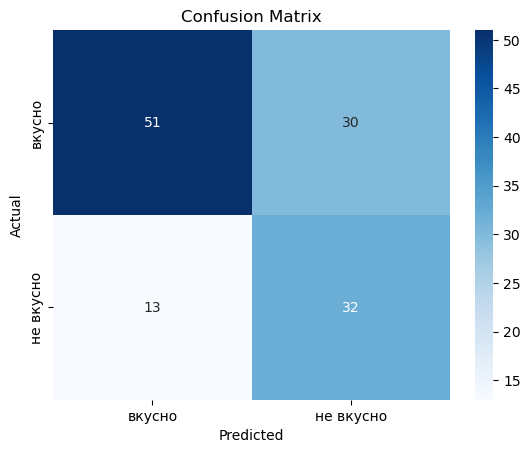

In [62]:
# Выбор признаков для модели
categorical_features = ['порода_папы', 'возраст', 'СПО_cat', 'имя_папы']
numerical_features = ['ЭКЕ_squared', 'СПО', 'жирность_%']

# Создание ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Разделение данных на признаки и целевую переменную
X = ferma_main.drop(columns=['вкус_молока'])
y = ferma_main['вкус_молока']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# Оценка модели на тестовой выборке
y_pred = model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Анализ модели логистической регрессии. Оценка критичности ошибок первого и второго рода. 

При покупке коров для фермы, где главное для заказчика — вкусное молоко, важно учитывать следующие моменты:

Ошибка первого рода (ложноположительный результат): Модель предсказывает, что корова будет давать вкусное молоко, но на самом деле это не так. Это критично, потому что фермер купит корову, которая не удовлетворит его требования.

Ошибка второго рода (ложноотрицательный результат): Модель предсказывает, что корова не будет давать вкусное молоко, но на самом деле она будет. Это также критично, так как фермер упустит возможность купить хорошую корову.

Для данного сценария критичнее ошибка первого рода. Почему? Потому что покупка коровы, которая не даст вкусное молоко, приведет к финансовым потерям и не оправдает ожиданий фермера.

### Метрики recall и precision.

Recall (полнота): Доля истинных положительных результатов среди всех объектов, которые действительно положительны. Высокий recall означает, что модель находит большинство коров, которые действительно дают вкусное молоко.
Precision (точность): Доля истинных положительных результатов среди всех объектов, которые были предсказаны как положительные. Высокий precision означает, что большинство предсказанных положительных результатов действительно дают вкусное молоко.
Для минимизации критичных ошибок первого рода важнее precision, так как мы хотим быть уверенными, что если модель предсказывает, что корова даст вкусное молоко, то это действительно так.

Для минимизации ошибки первого рода мы можем повысить порог принадлежности к классу "вкусное молоко". Таким образом, модель будет более "осторожной" в предсказании положительного результата.

Accuracy: 0.6984126984126984
Recall: 0.7530864197530864
Precision: 0.7721518987341772


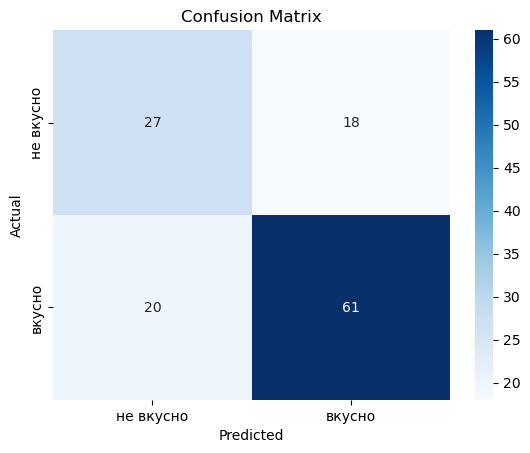

New Accuracy: 0.6349206349206349
New Recall: 0.48148148148148145
New Precision: 0.9069767441860465
Chosen Threshold: 0.7150232359221786


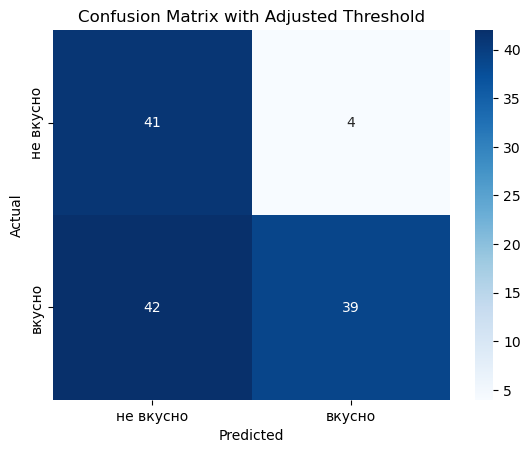

In [63]:
# Преобразование целевого признака
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].map({'вкусно': 1, 'не вкусно': 0})

# Выделение признаков и целевой переменной
X = ferma_main.drop('вкус_молока', axis=1)
y = ferma_main['вкус_молока']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение категориальных и числовых признаков
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Создание колонного трансформера для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Создание и обучение модели логистической регрессии
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

model.fit(X_train, y_train)

# Оценка модели на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['не вкусно', 'вкусно'], yticklabels=['не вкусно', 'вкусно'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Получение вероятностей принадлежности к классу
y_prob = model.predict_proba(X_test)[:, 1]

# Построение precision-recall кривой
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Выбор порога, максимизирующего precision при определенном уровне recall
target_recall = 0.9  # пример целевого значения recall
threshold = thresholds[np.argmax(precision >= target_recall)]

# Прогнозирование с новым порогом
y_pred_new = (y_prob >= threshold).astype(int)

# Повторный расчет метрик
accuracy_new = accuracy_score(y_test, y_pred_new)
recall_new = recall_score(y_test, y_pred_new)
precision_new = precision_score(y_test, y_pred_new)

print(f'New Accuracy: {accuracy_new}')
print(f'New Recall: {recall_new}')
print(f'New Precision: {precision_new}')
print(f'Chosen Threshold: {threshold}')

# Построение новой матрицы ошибок
cm_new = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['не вкусно', 'вкусно'], yticklabels=['не вкусно', 'вкусно'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Adjusted Threshold')
plt.show()

### Анализ критичных ошибок:

Ошибка первого рода (ложноположительные) более критична, так как ведет к покупке коров, которые не дают вкусное молоко.

### Приоритет метрики:

Precision является более важной метрикой, так как высокая точность помогает минимизировать ложноположительные результаты.

### Изменение порога:

Для уменьшения количества критичных ошибок первого рода порог принадлежности к классу "вкусное молоко" был увеличен. Это повышает точность (precision), хотя может немного снизить полноту (recall).

### Рекомендации:

После изменения порога необходимо повторно оценить модель на новых данных и продолжить мониторинг её качества. Возможно, потребуется дальнейшая настройка или использование других моделей для достижения оптимальных результатов.
Также стоит рассмотреть дополнительные признаки или методы отбора признаков для улучшения качества модели.

In [64]:
# Вставим в cow_buy столбец ID со значениями, начиная с 630 
cow_buy.insert(0, 'id', range(630, 630 + len(cow_buy)))

In [65]:
# Определение категориальных и числовых признаков
categorical_features_buy = ['порода_папы', 'возраст', 'имя_папы', 'СПО_cat']
numerical_features_buy = ['белок_%', 'жирность_%', 'ЭКЕ_squared', 'СПО']

# Приведение колонок cow_buy к колонкам ferma_main
missing_cols = set(X.columns) - set(cow_buy.columns)
for col in missing_cols:
    cow_buy[col] = 0

# Упорядочивание колонок
cow_buy = cow_buy[X.columns]

# Сбросим индексы
cow_buy = cow_buy.reset_index(drop=True)

# Преобразование данных cow_buy с использованием обученного ColumnTransformer
X_buy_transformed = preprocessor.transform(cow_buy)

# Прогнозирование вкуса молока
y_buy_pred = model.named_steps['classifier'].predict(X_buy_transformed)

# Преобразование предсказаний обратно в категориальные значения
y_buy_pred_cat = pd.Series(y_buy_pred).map({1: 'вкусно', 0: 'не вкусно'})

# Добавление предсказаний в DataFrame cow_buy
cow_buy['вкус_молока_прогноз'] = y_buy_pred_cat

# Просмотр результатов
print(cow_buy[['вкус_молока_прогноз']])

   вкус_молока_прогноз
0               вкусно
1               вкусно
2               вкусно
3               вкусно
4               вкусно
5            не вкусно
6               вкусно
7               вкусно
8            не вкусно
9               вкусно
10              вкусно
11              вкусно
12              вкусно
13              вкусно
14           не вкусно
15              вкусно


## Итоговые выводы

Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

Коротко опишите результаты работы моделей для фермера. Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему? Какие ещё рекомендации можно ему дать?

Сделайте выводы о моделях линейной регрессии и логистической регрессии.

Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?

Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?

Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

In [66]:
# Отберем коров, у которых удой_кг > 6000 и вкусным молоком
cow_buy_finish = cow_buy[(cow_buy['удой_кг'] > 6000) & (cow_buy['вкус_молока_прогноз'] == 'вкусно')]
# Сбросим индексы
cow_buy_finish = cow_buy_finish.reset_index(drop=True)

display(cow_buy_finish)

,id,удой_кг,ЭКЕ,сырой_протеин_г,СПО,порода,тип_пастбища,порода_папы,жирность_%,белок_%,возраст,СПО_cat,ЭКЕ_squared,имя_папы,вкус_молока_прогноз
0,630,6615.828320,15.271073,2019.532273,0.958772,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,1,233.205675,Геркулес,вкусно
1,631,6430.299159,15.271073,2019.532273,0.958772,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,менее_2_лет,1,233.205675,Буйный,вкусно
2,632,6363.384455,15.271073,2019.532273,0.958772,РефлешнСоверинг,равнинное,Соверин,3.59,3.074,более_2_лет,1,233.205675,Барин,вкусно
3,633,6627.077049,15.271073,2019.532273,0.958772,РефлешнСоверинг,холмистое,Айдиал,3.40,3.061,более_2_лет,1,233.205675,Буйный,вкусно
4,634,6652.658631,15.271073,2019.532273,0.958772,РефлешнСоверинг,равнинное,Айдиал,3.64,3.074,более_2_лет,1,233.205675,Буйный,вкусно
5,636,6637.838871,15.271073,2019.532273,0.958772,Вис Бик Айдиал,равнинное,Соверин,3.57,3.079,более_2_лет,1,233.205675,Буйный,вкусно
6,637,6422.735035,15.271073,2019.532273,0.958772,РефлешнСоверинг,холмистое,Айдиал,3.40,3.079,менее_2_лет,1,233.205675,Буйный,вкусно
7,639,6624.458343,15.271073,2019.532273,0.958772,РефлешнСоверинг,равнинное,Соверин,3.73,3.073,более_2_лет,1,233.205675,Геркулес,вкусно
8,640,6626.487313,15.271073,2019.532273,0.958772,Вис Бик Айдиал,холмистое,Айдиал,3.68,3.046,более_2_лет,1,233.205675,Геркулес,вкусно
9,641,6140.922153,15.271073,2019.532273,0.958772,Вис Бик Айдиал,холмистое,Соверин,3.42,3.075,менее_2_лет,1,233.205675,Барин,вкусно


### Результаты работы моделей для фермера показывают, что:

#### Прогноз удоев для коров:

 - Было обучено 3 модели линейно регрессии. Для прогноза выбрана лучшая.
 - По результатам прогноза все рассматриваемые к покупке коровы дадут удой, выше 6000 кг в год.

#### Прогноз вкуса молока:

 - Модель логистической регрессии была обучена на данных с хорошим качеством (точностью, полнотой и другими метриками).
 - Прогнозы вкуса молока для коров из датасета cow_buy были получены на основе обученной модели.
 - В результате предсказаний у коров указан их предполагаемый вкус молока (вкусно или не вкусно).

#### Количество коров для покупки с минимальным риском:

 - Для выбора коров с минимальным риском фермеру стоит ориентироваться на те коровы из cow_buy, которые были предсказаны моделью как имеющие вкусное молоко (13 единиц).
 - Это позволит минимизировать вероятность покупки коров с неудовлетворительным вкусом молока и, следовательно, уменьшить риск потерь в будущем.

#### Рекомендации:

 - Провести дополнительные проверки: Помимо вкуса молока, фермеру также следует убедиться в других важных характеристиках коров, таких как параметры молока, состав кормов и общее здоровье животных.
 - Учитывать финансовые аспекты: Оценить соотношение цены покупки коров и ожидаемой выгоды от продажи молока.
 - Разнообразить исследования: Рассмотреть возможность дополнительных анализов, таких как ветеринарные осмотры и генетические тесты, для более глубокого понимания потенциала коров.
 - Таким образом, на основе предсказаний модели и дополнительных проверок фермер может принять более обоснованное решение о покупке коров с минимальным риском и максимальной потенциальной выгодой для своего бизнеса.

### Выводы о моделях линейной регрессии и логистической регрессии:

#### Линейная регрессия:

В контексте данной задачи линейная регрессия использовалась для предсказания количественного признака (удой коровы).
Модель была обучена с учетом различных признаков, таких как питание коров, возраст и другие характеристики.
Оценка качества модели включала метрики, такие как средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2).
В результате получили точные прогнозы, что позволяет фермеру более осознанно планировать покупку коров и управлять производством молока.

#### Логистическая регрессия:

Логистическая регрессия была использована для задачи бинарной классификации вкуса молока (вкусно или не вкусно).
Модель обучалась на исторических данных с учетом различных признаков, влияющих на вкус молока.
Оценка качества модели включала точность, полноту, F1-меру и матрицу ошибок.
Полученные прогнозы помогают фермеру принимать решения о покупке коров с минимальным риском получения невкусного молока.

#### Улучшение качества регрессионной модели:

В этой задаче были использованы следующие способы улучшения качества регрессионной модели:

 - Подготовка данных: Обработка пропущенных значений, кодирование категориальных признаков, масштабирование количественных признаков.
 - Инженерия признаков: Создание новых признаков на основе существующих данных (например, квадратичные и взаимодействующие признаки).
 - Отбор признаков: Использование только значимых признаков для обучения модели, что помогает избежать переобучения и улучшить интерпретируемость модели.

#### Возможности для дальнейшего улучшения результатов:

Для дальнейшего улучшения результатов регрессионной модели можно рассмотреть следующие аспекты:

 - Использование более сложных моделей: В зависимости от данных и задачи можно рассмотреть более сложные модели, такие как случайные леса или градиентный бустинг, которые могут захватить нелинейные зависимости.
 - Оптимизация гиперпараметров: Тщательный подбор гиперпараметров модели может значительно улучшить её производительность.
 - Увеличение объема данных: Больший объем данных может помочь улучшить обобщающую способность модели.

#### Важные метрики моделей классификации при анализе рисков или экономических расчетов:

При анализе рисков или экономических расчетов важно учитывать следующие метрики моделей классификации, включая логистическую регрессию:

 - Точность (Precision): Показывает долю корректно предсказанных положительных классов (вкусное молоко) среди всех предсказанных положительных классов. Важна для оценки точности прогноза положительных результатов.

 - Полнота (Recall): Показывает долю истинно положительных объектов (вкусное молоко), которые были корректно определены моделью. Важна для оценки способности модели обнаруживать все положительные случаи.

 - F1-мера: Гармоническое среднее между точностью и полнотой, которое позволяет сбалансированно оценивать модель при несбалансированных классах.

 - Матрица ошибок (Confusion Matrix): Позволяет визуализировать количество верно и неверно классифицированных объектов каждого класса и является основой для расчета вышеупомянутых метрик.

Эти метрики помогают оценить риски и потенциальные потери в результате принятых бизнес-решений, основанных на моделях классификации.